# Data Science Principles and Practices Lab Week 7

Follow the instructions to complete each of these tasks. This set of exercises looks at MAP inference and an application of Naive Bayes classification. Do not worry if you do not complete them all in the timetabled lab session.

This is not assessed but will help you gain practical experience for the module exam and coursework.

First import the Python libraries we will be using this week by running the cell below:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# Maximum Likelihood and MAP inference

In the first part of this notebook, we will look at performing maximum likelihood and MAP inference on some synthetic data we have generated.

To do this we will use the numpy random number generation functions to generate random samples from a normal distribution, with a known mean and standard deviation.

The code below generates 5 random samples from a normal distribution with mean 10 and standard deviation 1. We will then use this data as if we had observed it without knowing the mean, and try to infer the mean from the data.

To make it easier to debug code and visualise the results, the *seed* of the random number generator is fixed in the code cell below. This means that the random values generated will always be the same, even if the code is run multiple times. You should not usually do this, unless you are debugging code to reproduce an error.

In [2]:
np.random.seed(7012)

N = 5 # sample size
mu = 10 # population mean
sigma = 1 # population standard diviation

x = np.random.normal(loc=mu, scale=sigma, size=N)
x

array([10.32711283,  8.42770783,  9.05873434, 11.86812946, 10.96743478])

## Maximum likelihood inference

First we will consider maximum likelihood inference, using the approach described in the lectures for week 7. Instead of using the fit() method of the scipy normal distribution, we will try to maximise the logarithm of the likelihood, by writing a Python function that returns the *negative* log likelihood, and minimising it.

### Task 1.1

Write Python code to calculate the logarithm of the likelihood of the data points in x, for a normal distribution with mean equal to 7.0, and standard deviation 1.0. You can use the scipy method

```python
norm.logpdf(x,loc=mean,scale=sd)
```

to calculate an array of the logarithm of $p(x_i|\mu,\sigma)$ for each value $x_i$ in the array $x$. You might want to look at the output of the norm.logpdf() method to see the array that is produced.

The next step is to add these up, using the np.sum() method, as to find the logarithm of the likelihood, we replace the product (multiplication) in the likelihood with the sum:

$\log p(x|\mu,\sigma) = \sum_i \log p(x_i|\mu,\sigma)$

In [3]:
l = norm.logpdf(x,loc=7,scale=1.0)
np.sum(l)

-32.98751251589202

### Task 1.2

Now we will use this Python code to build a Python function that returns the *negative* log likelihood of the data, for a particular value of the mean of our normal distribution. **We will assume that the standard deviation is known and is fixed at 1.0**

As a reminder, to define a function in Python, we used the *def* keyword, and specify any arguments we wish to provide to the function, and the return value:

```python
def f(mu):
    loglikelihood = mu # This is just an example! Enter the correct code here
    return loglikelihood
```

Use this function definition below to define a function to calculate the *negative* log likelihood. Don't forget that you will need to change the return value to return the negative value. Try using your function to evaluate the negative log likelihood at $mu=7$.

In [4]:
def f(mu):
    l = norm.logpdf(x,loc=mu,scale=1.0)
    return -np.sum(l)

f(7)

32.98751251589202

### Task 1.3

We can use the *minimize()* function from scipy to find the value of mu which minimises our function. We provide the name of the function we would like to minimise, and a starting value, and the minimise function will search over the possible input values to the function to find function argument that gives the smallest return value.

```python
minimize(f,0.0)
```

Try this below with the function you defined in task 1.2. You should see an output giving various pieces of information. To extract just the final minimised value for $\mu$, you can use:

```python
minimize(f,0.0).x
```

to extract just the optimum function argument that gives the smallest return value. Compare this with the maximum likelihood estimate of the mean derived in week 5 using:

```python
np.sum(x)/N
```

In [5]:
minimize(f,0)

      fun: 8.498019192940484
 hess_inv: array([[0.19999998]])
      jac: array([-2.74181366e-06])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([10.1298233])

In [6]:
np.sum(x)/5

10.129823849545037

### Task 1.4

We can plot the values of our function f(mu) for a range of values for *mu* to check that the minimisation has worked.

To do this we can create a range of values using the numpy function *linspace*, and then calculate values of f() for each of these, and finally plot them.

```python
mus = np.linspace(-10,30,1000) # create an array of 1000 values from -10 to 30.

ys = [] # create an empty list of y coordinates
for mu in mus: # for each value of mu in the range
    ys.append(f(mu)) # add f(mu) to the list of y coordinates
    
plt.plot(mus,ys) # plot a line for the negative log likelihood
plt.axvline(np.sum(x)/5,color='red') # add a red vertical line at the ML estimate of mu
```

Try this below. You can also try using *ys.append(-f(mu))* to see that this corresponds to the maximum of the log likelihood.

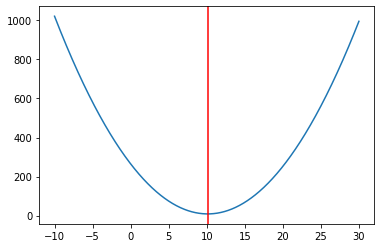

In [7]:
mus = np.linspace(-10,30,1000) # create an array of 1000 values from -10 to 30.

ys = [] # create an empty list of y coordinates
for mu in mus: # for each value of mu in the range
    ys.append(f(mu)) # add f(mu) to the list of y coordinates
    
plt.plot(mus,ys) # plot a line for the negative log likelihood
plt.axvline(np.sum(x)/5,color='red') # add a red vertical line at the ML estimate of mu

## MAP inference

Next we will look at performing MAP inference by adding a prior to our likelihood, so that we are minimising the posterior density. We will consider a very wide normal distribution centered at zero as the prior.

### Task 1.5

First we will plot the prior. Using a prior with parameters:

```python
prior_mean = 0.0
prior_sd = 5.0
```

create a range of values to plot the prior at using *np.linspace()*:

```python
mus = np.linspace(-20,20,1000)
```

Now use the scipy *norm.pdf()* method to calculate the probability density at each value in *mus*:

```python
ys = norm.pdf(xs,loc=prior_mean,scale=prior_sd)
```

Finally we can plot these values using

```python
plt.plot(mus,ys)
```

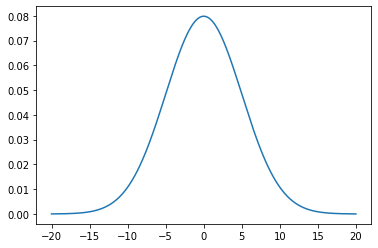

In [8]:
prior_mean = 0.0
prior_sd = 5.0

mus = np.linspace(-20,20,1000)

ys = norm.pdf(mus,loc=prior_mean,scale=prior_sd)

plt.plot(mus,ys)

## Posterior

We can use a modified version of our function to return the negative log likelihood for a given value of *mu* to evaluate the posterior for a value of *mu*. This will be calculating:

$\log p(\mu|x,\sigma) \propto \left(\sum_i \log p(x_i|\mu,\sigma)\right) + \log p(\mu)$

(since we are assuming we know $\sigma$, there is no prior on $\sigma$.)

### Task 1.6

Write a Python function to calculate the negative logarithm of the posterior, by adding the prior density of $\mu$ to the log likelihood. You can use a framework like this:

```python
def nlposterior(mu):
    loglikelihood_array = norm.logpdf(x,loc=mu,scale=1.0)
    loglikelihood = np.sum(loglikelihood_array)
    prior = norm.logpdf(....) #fill in here
    return -(loglikelihood+prior)
```

Remember the prior mean and standard deviation are defined as:

```python
prior_mean = 0.0
prior_sd = 5.0
```

In [9]:
def nlposterior(mu):
    loglikelihood_array = norm.logpdf(x,loc=mu,scale=1.0)
    loglikelihood = np.sum(loglikelihood_array)
    prior = norm.logpdf(mu,loc=prior_mean,scale=prior_sd)
    return -(loglikelihood+prior)

### Task 1.7

Use the scipy *minimize* function to find the value of *mu* (the argument to your nlposterior function) that minimises the negative log posterior, as we did with the negative log likelihood.

In [10]:
minimize(nlposterior,0)

      fun: 13.062374432681914
 hess_inv: array([[0.1984127]])
      jac: array([3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([10.04942848])

We can plot both the negative log posterior in the same way as we did for the negative log likelihood:

```python
mus = np.linspace(9,11,1000) # create an array of 1000 values from -10 to 30.

ys = [] # create an empty list of y coordinates
for mu in mus: # for each value of mu in the range
    ys.append(nlposterior(mu)) # add f(mu) to the list of y coordinates
    
plt.plot(mus,ys) # plot a line for the negative log likelihood

ml_estimate = np.sum(x)/5
map_estimate = minimize(nlposterior,0).x

plt.axvline(ml_estimate,color='red') # add a red vertical line at the ML estimate of mu
plt.axvline(map_estimate,color='green') # add a green vertical line at the MAP estimate of mu
```

Try this below.

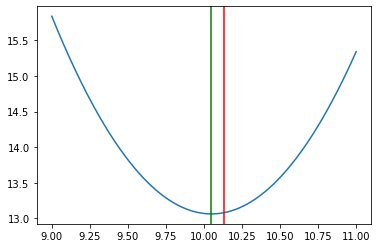

In [11]:
mus = np.linspace(9,11,1000) # create an array of 1000 values from -10 to 30.

ys = [] # create an empty list of y coordinates
for mu in mus: # for each value of mu in the range
    ys.append(nlposterior(mu)) # add f(mu) to the list of y coordinates
    
plt.plot(mus,ys) # plot a line for the negative log likelihood

ml_estimate = np.sum(x)/5
map_estimate = minimize(nlposterior,0).x

plt.axvline(ml_estimate,color='red') # add a red vertical line at the ML estimate of mu
plt.axvline(map_estimate,color='green') # add a green vertical line at the MAP estimate of mu

# Scikit-learn

In the next part, we are going to use scikit-learn to apply a Naive Bayes classification method to some data.

You can find out more about scikit-learn here:

https://scikit-learn.org/stable/

First import scikit-learn and the functions we will be using:

In [1]:
import sklearn
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
from sklearn.naive_bayes import GaussianNB

# Naive Bayes

We can perform classification on data using a method known as Naive Bayes. Scikit-learn provides us with a class that we can use to create Python objects corresponding to Naive Bayes models, and train them on data.

We will use some synthetic data to perform classification using Naive Bayes.

### Task 2.1

First of all load the data using the numpy *loadtxt* function:

```python
X = np.loadtxt("NaiveBayesX.csv",delimiter=',')
labels = np.loadtxt("NaiveBayesLabels.csv",delimiter=',')
```

The values in X are two dimensional data points, stored with each data point as a single row. The labels are the true class labels for each data point. You might want to look at the contents of X and labels to understand the data we will be using.

Then try plotting the data using:

```python
plt.scatter(X[:,0],X[:,1],c=labels)
```
This shows the label of each data point as its colour. There are three classes we would like to train our classifier to predict.

In [4]:
X = np.loadtxt("NaiveBayesX.csv",delimiter=',')
labels = np.loadtxt("NaiveBayesLabels.csv",delimiter=',')

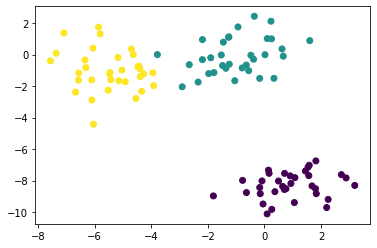

In [5]:
plt.scatter(X[:,0],X[:,1],c=labels)

### Task 2.2

To make sure the data are ready to use with the Naive Bayes model, we must first scale the data so that it has a mean of 0, and standard deviation 1. The scikit-learn *scale()* function will do this for us.

```python
X_scaled = sklearn.preprocessing.scale(X)
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=labels)
```

Try this below.

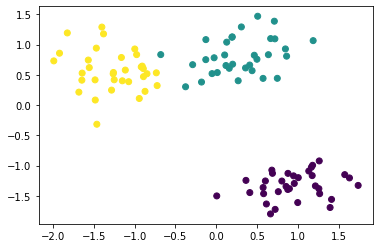

In [6]:
X_scaled = sklearn.preprocessing.scale(X)
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=labels)

## Naive Bayes models

In a Naive Bayes model, we need to define the likelihood of the data given that is belongs to a particular class, $p(x_i|c_k)$. In the lectures we looked at an example of this for integer count data with a multinomial distribution. For continuous data as we have here, we can use a Gaussian (normal) distribution for the likelihood.

Scikit-learn implements several Naive Bayes models, and you can read about them here:

https://scikit-learn.org/stable/modules/naive_bayes.html

### Task 2.3

In scikit-learn, creating and training models is very easy. Most scikit-learn models use a similar interface, whereby first a model is created, for example:

```python
nbclassifier = GaussianNB() # create our Naive Bayes model
```

Then the model can be fit to data using the *fit()* method of the model, and appropriate data:

```python
nbclassifier.fit(X_scaled,labels)
```

This will not produce any output, but the *nbclassifier* object has now learnt and stored the model parameters inside itself. We can then go on to use this model to make predictions.

Create and train a Naive Bayes model below.

In [7]:
nbclassifier = GaussianNB()
nbclassifier.fit(X_scaled,labels)

GaussianNB()

## Predictions

### Task 2.4

Many scikit-learn models have a *predict* method, that will predict the output for a given input. This means we can supply new values for X, and the classifier will predict the class for them. By default for the Naive Bayes model, the MAP estimate of the class label is returned.

We can create an array of new data points for which we would like to predict the label, and use the *predict()* method of our model to predict labels:

```python
X_new = np.array([[1.0,-1.0],
                  [0.0,0.5],
                  [-1.5,0.75]]) # An array of three new data points.

plt.scatter(X_scaled[:,0],X_scaled[:,1],c=labels) # Plot their locations
plt.scatter(X_new[:,0],X_new[:,1],color='red') # Using red cross symbols for the new points

nbclassifier.predict(X_new) # return the MAP estimate of the class label for each new data point
```

array([0., 1., 2.])

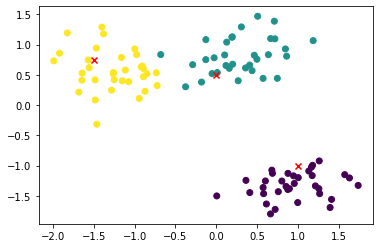

In [8]:
X_new = np.array([[1.0,-1.0],
                  [0.0,0.5],
                  [-1.5,0.75]])
    
    #[[0.45,-0.34],
     #             [0.5,-0.5],
      #            [-1.5,0.75]])

plt.scatter(X_scaled[:,0],X_scaled[:,1],c=labels) # Plot their locations
plt.scatter(X_new[:,0],X_new[:,1],color='red',marker='x')

nbclassifier.predict(X_new)

### Task 2.5

As well as returning the MAP estimate, the Naive Bayes classifier also has a *predict_proba()* method that will return the posterior probability of each class. For our array of new X values we can use:

```python
nbclassifier.predict_proba(X_new)
```

This will return an array with one row for each data point, and the posterior probability of each of the three classes as columns.

In [20]:
nbclassifier.predict_proba(X_new)

array([[2.86387366e-02, 9.71160069e-01, 2.01194350e-04],
       [8.99079468e-01, 1.00895952e-01, 2.45798190e-05],
       [3.01575340e-30, 5.95659134e-05, 9.99940434e-01]])

### Task 2.6

Now we can try plotting these for each of the new data points, for the data point in the first row of X_new:

```python
prob = nbclassifier.predict_proba(X_new)
plt.bar([0,1,2],prob[0,:]) # Plot posterior for class label of data point in row 0 of X_new
```

for the second row:

```python
plt.bar([0,1,2],prob[1,:]) # Plot posterior for class label of data point in row 1 of X_new
```

and so on.

Try this below.

<BarContainer object of 3 artists>

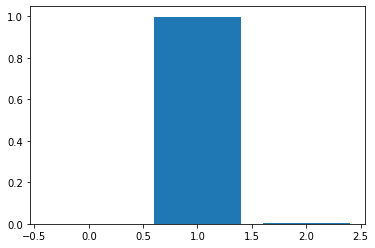

In [9]:
prob = nbclassifier.predict_proba(X_new)
plt.bar([0,1,2],prob[1,:])